In [110]:
#Importing Pandas, Seaborn
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np


In [111]:
#Read the Bank Customer Data
df = pd.read_csv('/Users/SaravanaTK/Desktop/GreatLearning/Bank_Personal_Loan_Modelling-1.csv')

In [112]:
#Print the first 5 rows of the dataframe
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [113]:
#Print the dataframe info - 5000 Rows, All integers except CCAvg feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [114]:
#Experience is having negative values. Need to treat the negative values before processing further. 
#ID and Zip Code features are probable candidates for dropping. Need to check the correllation.
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [115]:
#Check for missing values
#No missing values
df.isna().count()

ID                    5000
Age                   5000
Experience            5000
Income                5000
ZIP Code              5000
Family                5000
CCAvg                 5000
Education             5000
Mortgage              5000
Personal Loan         5000
Securities Account    5000
CD Account            5000
Online                5000
CreditCard            5000
dtype: int64

In [116]:
#52 rows with the experience less than 0. Experience seems to be negative.
df[df['Experience']<0].count()

ID                    52
Age                   52
Experience            52
Income                52
ZIP Code              52
Family                52
CCAvg                 52
Education             52
Mortgage              52
Personal Loan         52
Securities Account    52
CD Account            52
Online                52
CreditCard            52
dtype: int64

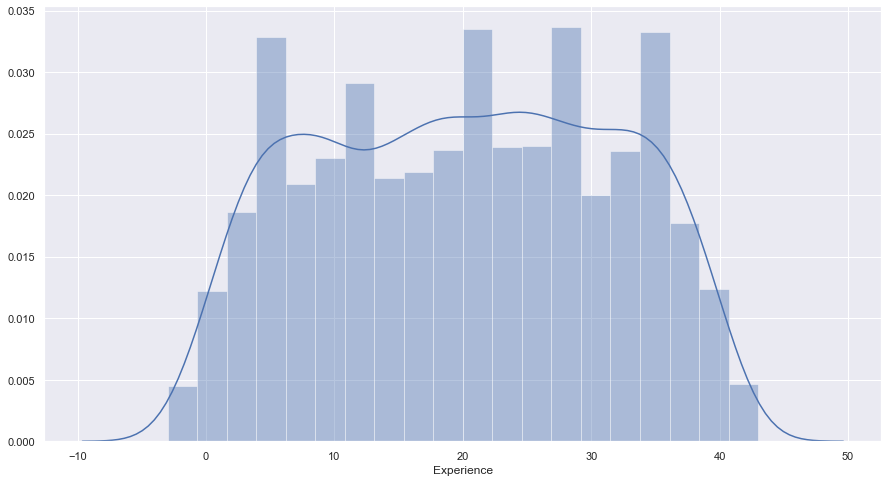

In [117]:
#Let's do distplot to find the distribution of the experience feature
sns.set(color_codes=True)
plot = sns.distplot(df.Experience)
plot.figure.set_size_inches(15,8)

In [118]:
#Replace the negative experience values with the null and then treat the nulls with the median
df.Experience.loc[(df.Experience < 0)] = df.Experience.median()

/Users/SaravanaTK/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [119]:
#Looks like the experience values less than 0 have been replaced with median
df[df['Experience']<0]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [120]:
#Let's validate by invoking the isna() function. Looks like there are no
df.isna().count()

ID                    5000
Age                   5000
Experience            5000
Income                5000
ZIP Code              5000
Family                5000
CCAvg                 5000
Education             5000
Mortgage              5000
Personal Loan         5000
Securities Account    5000
CD Account            5000
Online                5000
CreditCard            5000
dtype: int64

/Users/SaravanaTK/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/SaravanaTK/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


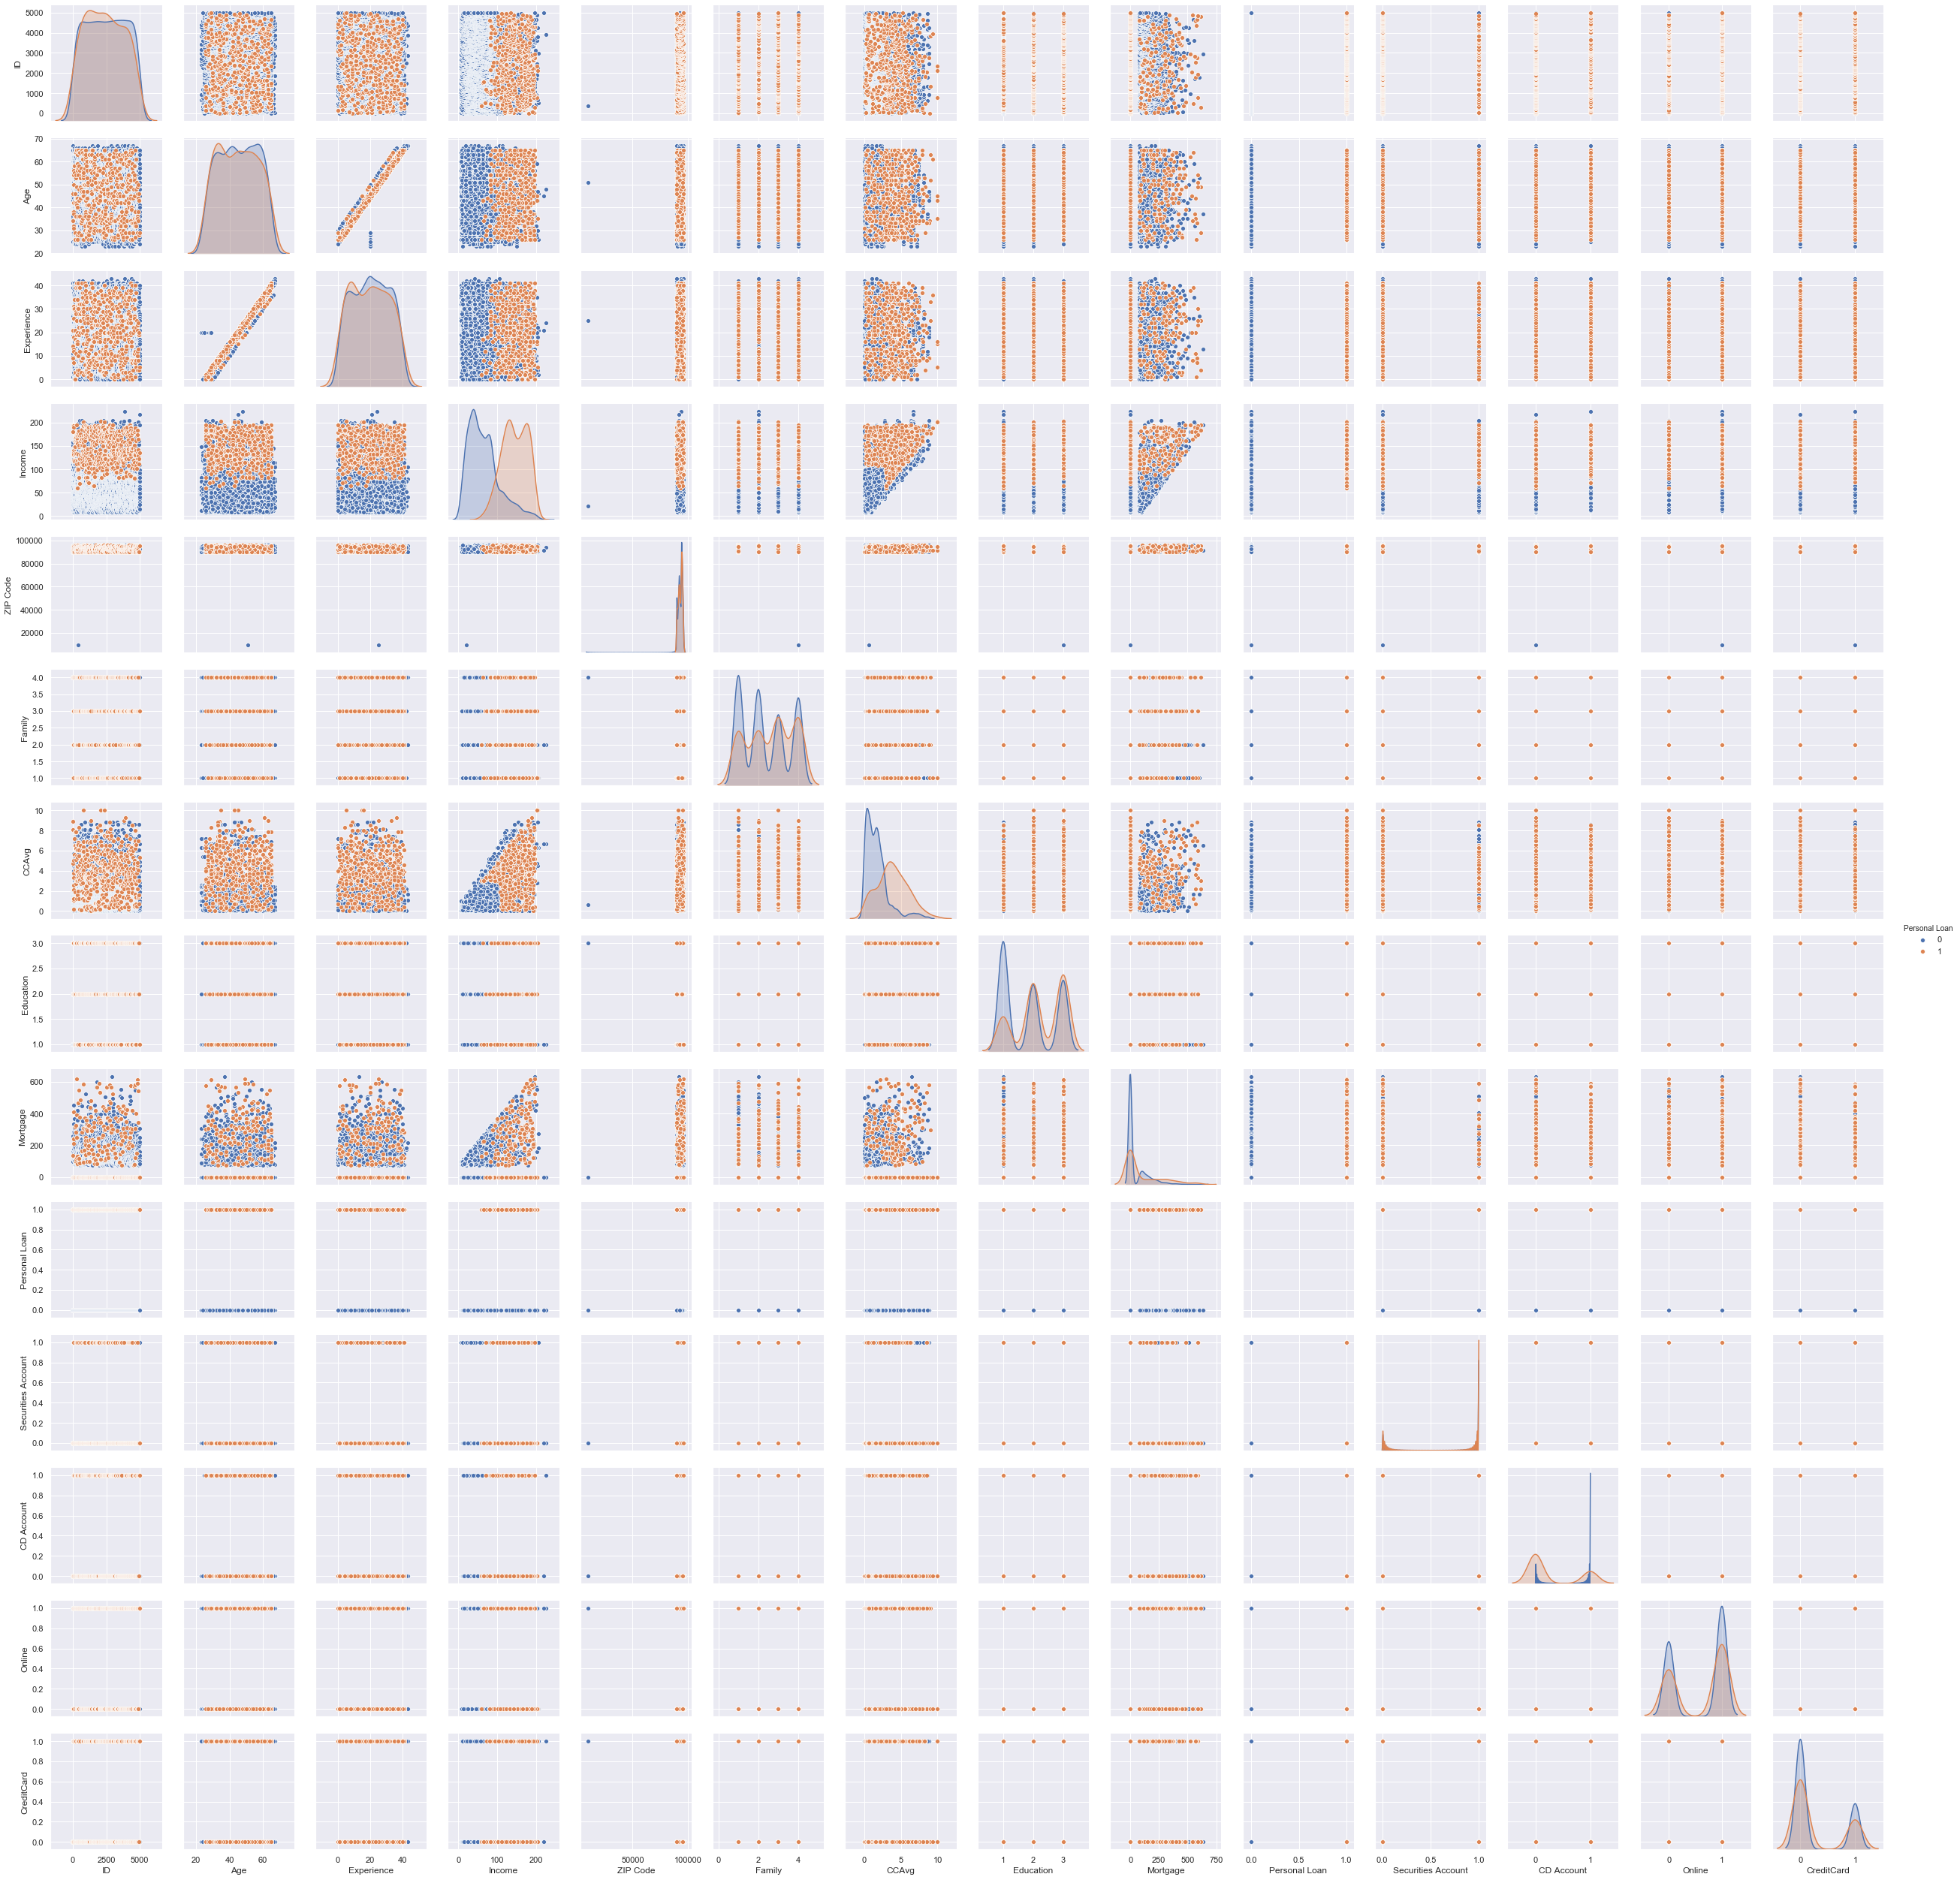

In [121]:
sns.pairplot(df, hue="Personal Loan")

#There seems to be a linear correlation between income and mortgage 
#Also there is a linear correlation between income and Credit Card average
#ID column does not have any relevance to the data and hence can be dropped
#Age and experience have the similar correlations to all other columns
#People with higher income have gotten personal loans

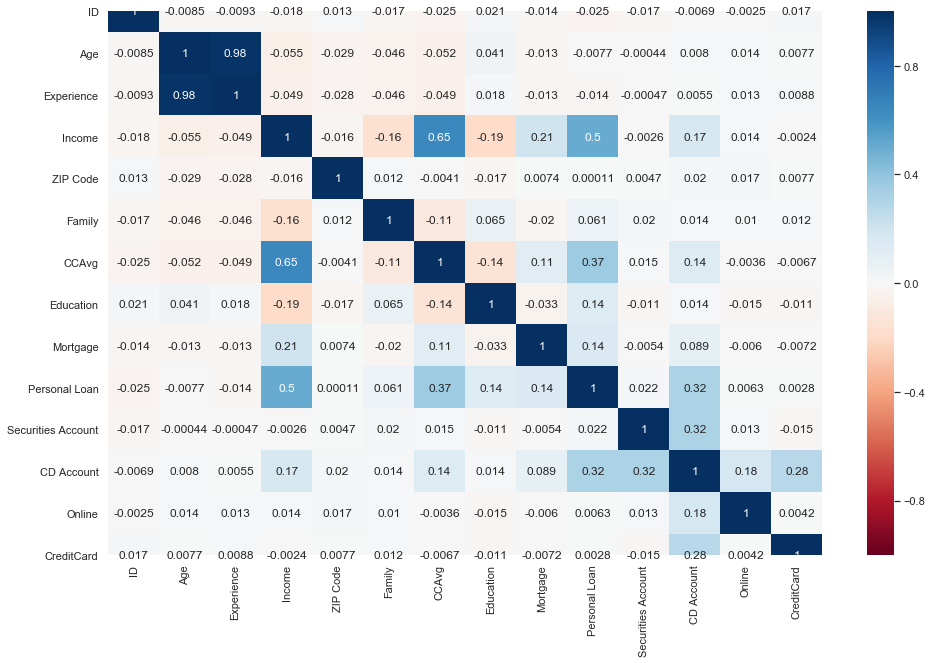

In [122]:
plt.figure(figsize=(16,10))

sns.heatmap(df.corr(),cmap='RdBu', annot=True, vmin=-1, vmax=1)

# There is a very strong correlation between age and experience. Probably one of the columns can be dropped.
# There is a strong correlation between income and Credit Card average
# There is a strong correlation between income and personal loan

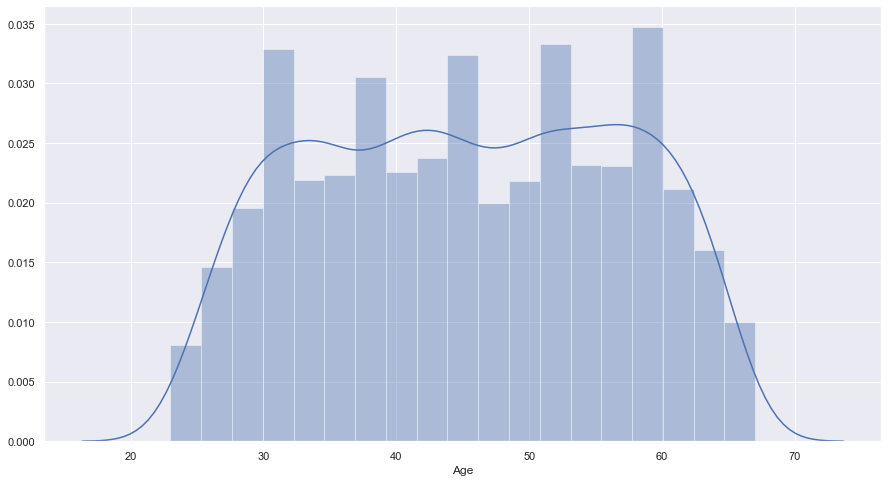

In [123]:
plot = sns.distplot(df.Age)
plot.figure.set_size_inches(15,8)

45.3384

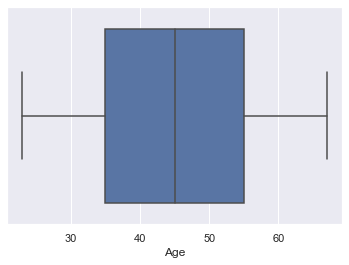

In [124]:
sns.boxplot(df.Age) #Age has no outliers and the mean is 45.3
df.Age.mean()

20.3276

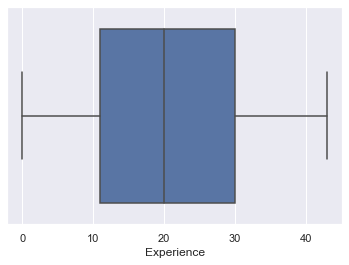

In [125]:
sns.boxplot(df.Experience) #Experience has no outliers and the mean is 20.3
df.Experience.mean()

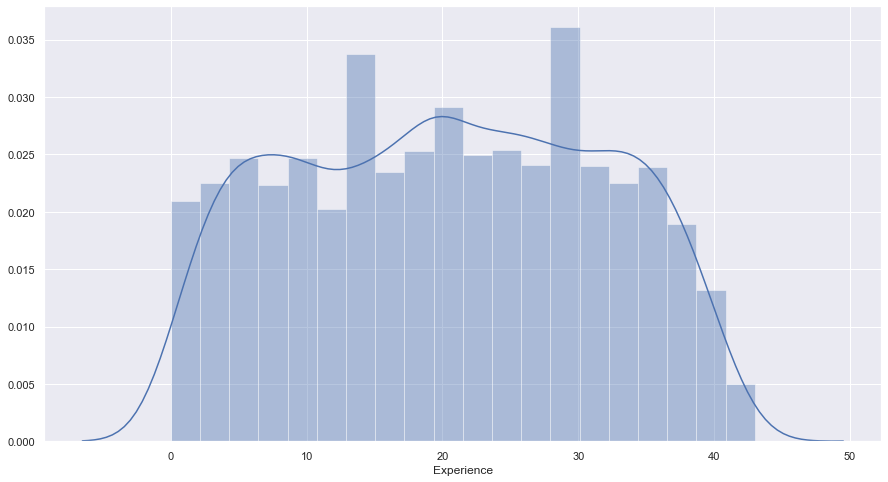

In [126]:
plot = sns.distplot(df.Experience)
plot.figure.set_size_inches(15,8)

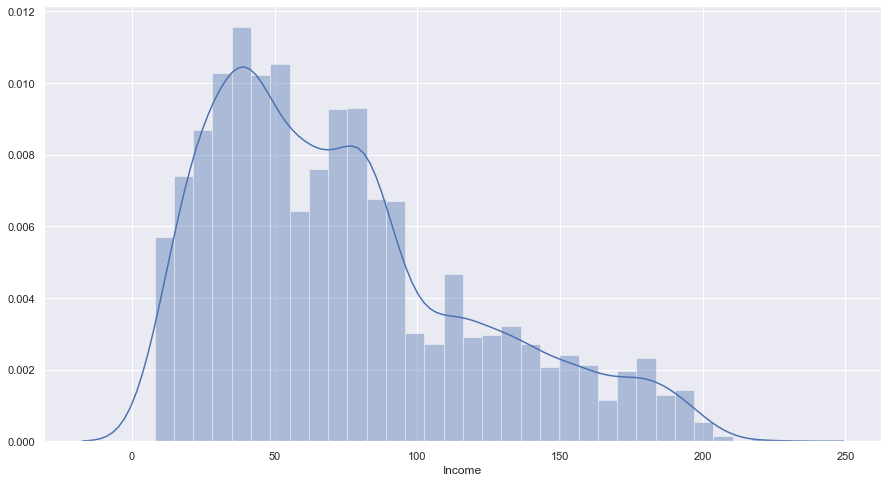

In [127]:
plot = sns.distplot(df.Income)
plot.figure.set_size_inches(15,8)

73.7742

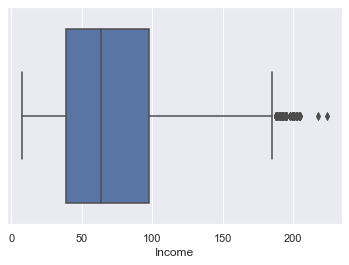

In [128]:
sns.boxplot(df.Income) # Income has outliers and the distribution is right tailed
df.Income.mean()

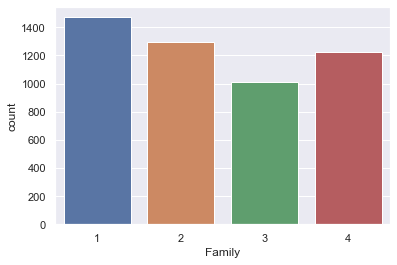

In [129]:
sns.countplot(df.Family) 

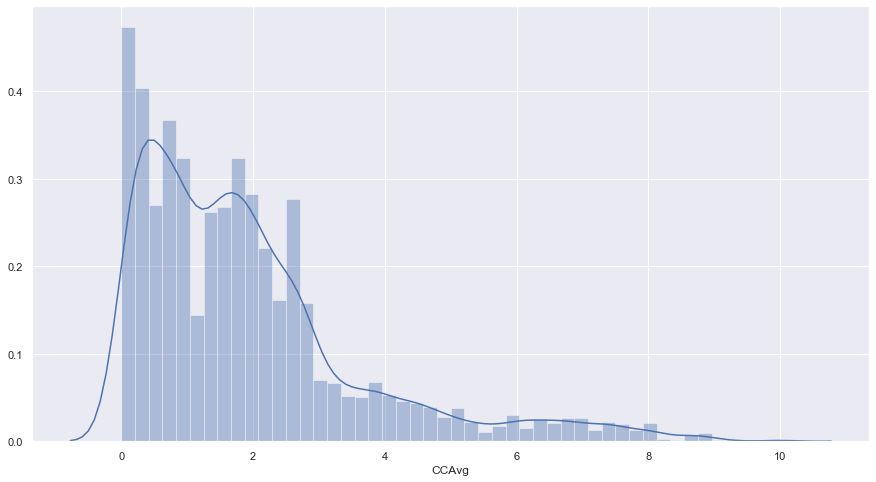

In [130]:
plot = sns.distplot(df.CCAvg)
plot.figure.set_size_inches(15,8)

1.9379380000000053

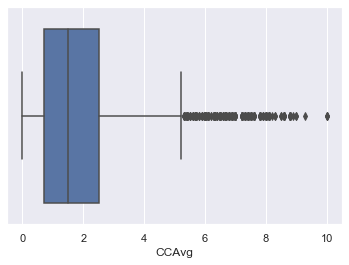

In [131]:
sns.boxplot(df.CCAvg) #A lot of outliers for CC Avg and the distribution is right tailed
df.CCAvg.mean()

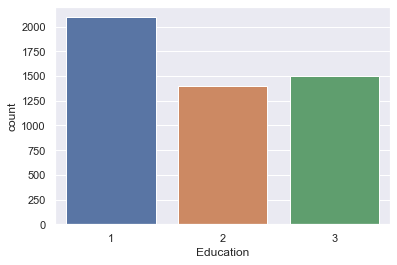

In [132]:
sns.countplot(df.Education)

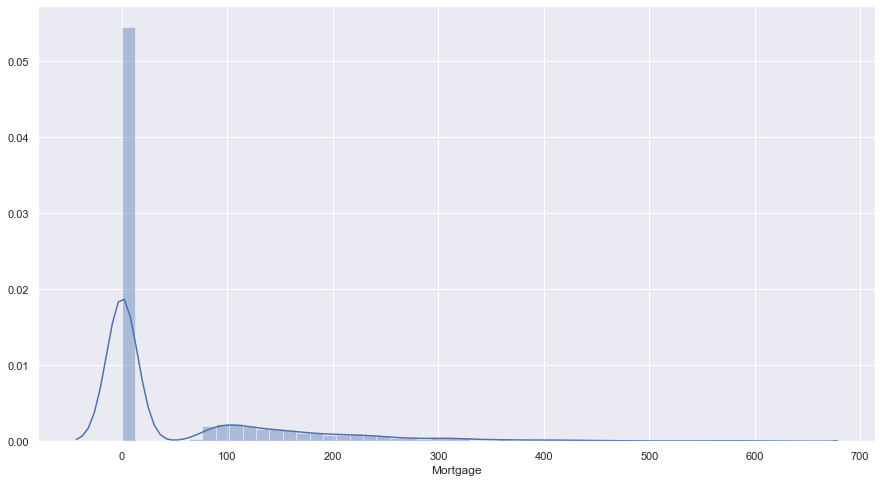

In [133]:
plot = sns.distplot(df.Mortgage)
plot.figure.set_size_inches(15,8)

In [134]:
df.Mortgage.loc[(df.Mortgage == 0)].count() #There are 3462 customers without mortgage

3462

In [135]:
df.Mortgage.loc[(df.Mortgage > 0)].count() #There are 1538 customers with mortgage

1538

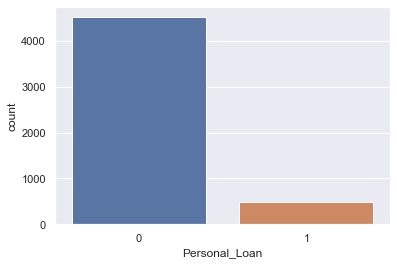

In [136]:
df.columns = df.columns.str.replace(' ', '_')
sns.countplot(df.Personal_Loan)

In [137]:
df.Personal_Loan.loc[(df.Personal_Loan) == 0].count()

4520

In [138]:
 df.Personal_Loan.loc[(df.Personal_Loan) > 0].count() #480 Customers have taken personal loan

480

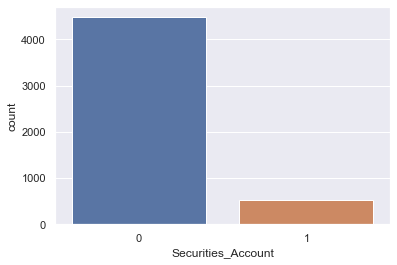

In [139]:
sns.countplot(df.Securities_Account)

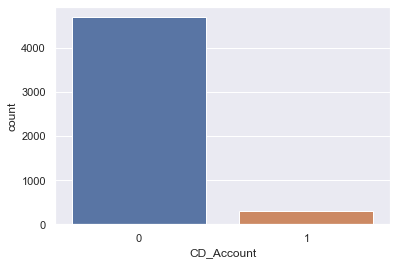

In [140]:
sns.countplot(df.CD_Account)

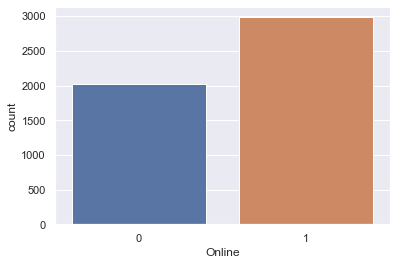

In [141]:
sns.countplot(df.Online) #There are more number of customers using online bank facilities

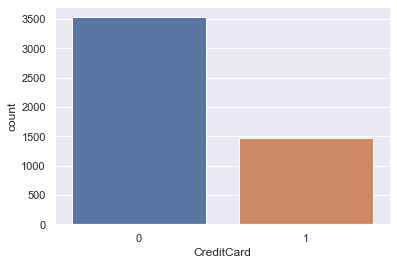

In [142]:
sns.countplot(df.CreditCard)

In [143]:
#Dropping ID and Zip Code features from the dataframe

df_final = df.drop(['ID','ZIP_Code'],axis=1)

In [144]:
df_final.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.327600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.253035,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,0.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,11.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [145]:
from sklearn.model_selection import train_test_split

In [146]:
X = df_final.drop(['Personal_Loan'],axis=1)

In [147]:
y = df_final['Personal_Loan']

In [148]:
#split the train and test data. 
#Normalization need to be done after the train test split as we don't want to introduce the bias by doing normalization before
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 7)

In [149]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3500, 11)
(1500, 11)
(3500,)
(1500,)


In [150]:
#Normalize the data
from sklearn import preprocessing
x=X_train.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_train = pd.DataFrame(x_scaled)
X_train.head(10)

,0,1,2,3,4,5,6,7,8,9,10
0,0.818182,0.790698,0.398148,0.666667,0.050,0.0,0.000000,0.0,0.0,0.0,1.0
1,0.909091,0.860465,0.111111,0.666667,0.070,0.5,0.222047,0.0,0.0,0.0,0.0
2,0.454545,0.418605,0.375000,0.000000,0.010,0.5,0.483465,0.0,0.0,0.0,1.0
3,0.613636,0.604651,0.791667,0.000000,0.290,1.0,0.000000,0.0,0.0,0.0,1.0
4,0.363636,0.325581,0.375000,0.333333,0.040,0.0,0.000000,0.0,0.0,1.0,0.0
5,0.204545,0.139535,0.111111,0.000000,0.190,1.0,0.000000,0.0,0.0,1.0,0.0
6,0.568182,0.511628,0.578704,0.333333,0.310,0.5,0.000000,0.0,0.0,1.0,0.0
7,0.409091,0.372093,0.509259,0.333333,0.330,0.0,0.000000,0.0,0.0,1.0,0.0
8,0.409091,0.395349,0.231481,1.000000,0.267,0.0,0.000000,0.0,0.0,1.0,1.0
9,0.772727,0.767442,0.523148,0.000000,0.430,0.0,0.000000,1.0,0.0,0.0,0.0


In [151]:
x=X_test.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_test = pd.DataFrame(x_scaled)
X_test.head(10)

,0,1,2,3,4,5,6,7,8,9,10
0,0.431818,0.279070,0.132653,0.666667,0.224719,1.0,0.000000,0.0,0.0,0.0,1.0
1,0.659091,0.651163,0.372449,0.666667,0.202247,0.5,0.000000,1.0,0.0,0.0,0.0
2,0.795455,0.651163,0.316327,0.000000,0.157303,1.0,0.000000,0.0,0.0,0.0,0.0
3,0.113636,0.093023,0.367347,0.666667,0.280899,0.0,0.000000,0.0,0.0,1.0,0.0
4,0.840909,0.813953,0.158163,0.333333,0.179775,1.0,0.000000,0.0,0.0,1.0,0.0
5,0.045455,0.023256,0.561224,0.000000,0.606742,0.0,0.000000,0.0,0.0,1.0,1.0
6,0.522727,0.465116,0.163265,0.000000,0.134831,0.5,0.000000,0.0,0.0,1.0,0.0
7,0.272727,0.232558,0.561224,0.333333,0.876404,0.0,0.584967,0.0,0.0,0.0,0.0
8,0.272727,0.232558,0.081633,1.000000,0.123596,1.0,0.000000,0.0,0.0,0.0,0.0
9,0.318182,0.255814,0.387755,1.000000,0.247191,0.5,0.000000,0.0,0.0,1.0,1.0


In [152]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

In [153]:

# empty list that will hold accuracy scores
ac_scores = []

for k in range(1, 50) :
  model = KNeighborsClassifier(n_neighbors = k)    # initialize the model
  model.fit(X_train, y_train)                      # fit the model
  y_pred = model.predict(X_test)                   # make predictions
  score = accuracy_score(y_test, y_pred)           # get accuracy
  ac_scores.append((score, k))                     # append accuracy score
  
# determining best k
print("The max accuracy and optimal number of neighbors is {}".format(max(ac_scores)))

The max accuracy and optimal number of neighbors is (0.9673333333333334, 3)


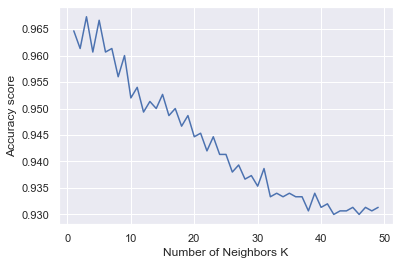

In [154]:
#KNN with 3 neigbors have the highest accuracy of 96.73%
import matplotlib.pyplot as plt

score, k = zip(*ac_scores)
plt.plot(k, score)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy score')
plt.show()

In [155]:
#Confusion matrix for KNN with 3 neighbors

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))

#True Positives - 1347
#True Negatives - 104
#False Positives - 15 (Type-1 error)
#False Negatives - 34 (Type-2 error)

[[1347   15]
 [  34  104]]


In [156]:
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))  

0.8957374342330175
0.9246648695683921
0.8713049862733832


In [157]:
from sklearn.linear_model import LogisticRegression

In [158]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Users/SaravanaTK/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [159]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.95


In [160]:
print(confusion_matrix(y_test,y_pred))

[[1332   30]
 [  44   94]]


In [161]:
#True Positives - 1332
#True Negatives - 94
#False Positives - 30 (Type-1 error)
#False Negatives - 44 (Type-2 error)

#The Accuracy of the Logistic regression is less than the KNN with 3 neighbors

In [162]:
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro")) 

0.8452651124406849
0.8630438859714928
0.8295664942858967


In [163]:
from sklearn.naive_bayes import MultinomialNB

In [164]:
nb = MultinomialNB()

In [165]:
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [166]:
y_pred = nb.predict(X_test)

In [167]:
print(nb.score(X_test,y_test))

0.9086666666666666


In [168]:
print (accuracy_score(y_test, y_pred))

0.9086666666666666


In [169]:
#The accuracy score for Naive Bayes is less than both KNN with 3 neighbors and Logistic Regression

In [170]:
print(confusion_matrix(y_test,y_pred))

[[1362    0]
 [ 137    1]]


In [171]:
#True Positives - 1362
#True Negatives - 1
#False Positives - 0 (Type-1 error)
#False Negatives - 137 (Type-2 error)

In [172]:
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro")) 

0.48325156721878704
0.9543028685790527
0.5036231884057971


In [173]:
#Based on Accuracy, KNN with 3 neighbors seems to be the best model in terms of accuracy being 96.73%
#The second best model is Logistic regression with accuracy of 95%
#Naive bayes has an accuracy of 90.86%
#One point to note is that the precision score of Naive Bayes is higher than KNN and Logistic regression